<a href="https://colab.research.google.com/github/laredein/NeuralNetworks/blob/master/XORPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
inp=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float)
out=torch.tensor([[0],[1],[1],[0]],dtype=torch.float)


class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        self.inp=2
        self.hid=2
        self.out=1
        self.w1=torch.randn(self.inp,self.hid)
        self.w2=torch.randn(self.hid,self.out)

        self.w1mom=0
        self.w2mom=0
        self.y=[]
    def forward(self,inp):
        self.z=torch.matmul(inp,self.w1)
        self.z2=self.sigmoid(self.z)
        self.z3=torch.matmul(self.z2,self.w2)
        o=self.sigmoid(self.z3)
        return o

    def sigmoid(self, s):
        return 1/(1+torch.exp(-s))

    def sigmoidder(self, s):
        return s*(1-s)

    def backward(self,inp,out,o):
        self.oerr=out-o
        self.odelta=self.oerr*self.sigmoidder(o)
        self.z2err=torch.matmul(self.odelta, torch.t(self.w2))
        self.z2delta=self.z2err*self.sigmoidder(self.z2)
        neww1=torch.matmul(torch.t(inp),self.z2delta)*0.5+self.w1mom*0.1
        neww2=torch.matmul(torch.t(self.z2),self.odelta)*0.5+self.w2mom*0.1
        self.w1=self.w1+neww1
        self.w2=self.w2+neww2
        self.w1mom=neww1
        self.w1mom=neww2
    def train(self,inp,out):
        o=self.forward(inp)
        self.backward(inp,out,o)
        self.y.append(((out-o)**2).sum())
    def save(self, model):
        torch.save(model, "NN")


    def predict(self):
        print (self.forward(torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float)))
NN=Neural_Network()
for i in range(100000):
    NN.train(inp,out)
NN.save(NN)
NN.predict()

tensor([[0.0106],
        [0.9712],
        [0.9713],
        [0.0386]])


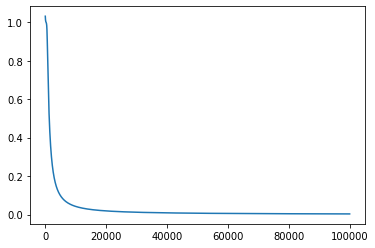

In [4]:
y=np.array(NN.y)
x=np.arange(len(y))
plt.plot(x,y)
plt.show()
